In [1]:
import ROOT as R
from util import *
from analysis_branch import *
import os

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/02


In [2]:
R.EnableImplicitMT()

In [3]:
rdf_dict = {}
histo_dict = {}
norm_path = '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_UL_DeepJet'
vnlo_path = '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0108_DYnloSTUDY'

In [4]:
string_list_for_TT     = []
string_list_for_ttbb   = []
string_list_for_DY     = []
string_list_for_Other  = []
string_list_for_ZHH    = []
string_list_for_Data   = []

file_list = os.listdir(norm_path)

for _file in file_list:
    if _file in file_list_for_TT:
        string_list_for_TT.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_for_ttbb:
        string_list_for_ttbb.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_DY:
        string_list_for_DY.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_Other:
        string_list_for_Other.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_Data:
        string_list_for_Data.append('{0}/{1}/*.root'.format(norm_path,_file))
    elif _file in file_list_ZHH:
        string_list_for_ZHH.append('{0}/{1}/*.root'.format(norm_path,_file))
        rdf_dict[_file] = R.RDataFrame('Events','{0}/{1}/*.root'.format(norm_path,_file))
    else:
        print("WARNING:::File : "+_file+" is not in any case. Will be DROPPED.")
#END


In [5]:
rdf_dict['norm_DY_LO']     = R.RDataFrame('Events', string_list_for_DY, {'weight','benPlusHTWeight','VBenrichShapeWeight'})

In [6]:
model = R.RDF.TH1DModel('norm_DY_LO', 'norm_DY_LO_weight', 20, -1, 1)

In [12]:
histo_dict['norm_DY_LO_weight'] = rdf_dict['norm_DY_LO'].Histo1D('weight')

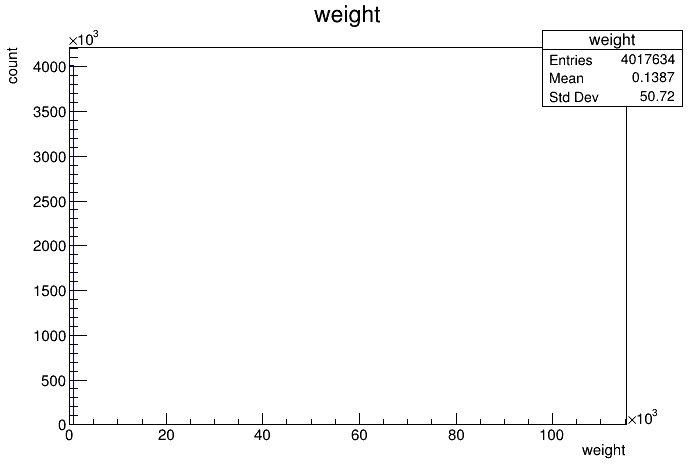

In [13]:
c = R.TCanvas()
histo_dict['norm_DY_LO_weight'].Draw()
c.Draw()

In [14]:
histo_dict['norm_DY_LO_benPlusHTWeight'] = rdf_dict['norm_DY_LO'].Histo1D('benPlusHTWeight')
histo_dict['norm_DY_LO_VBenrichShapeWeight'] = rdf_dict['norm_DY_LO'].Histo1D('VBenrichShapeWeight')

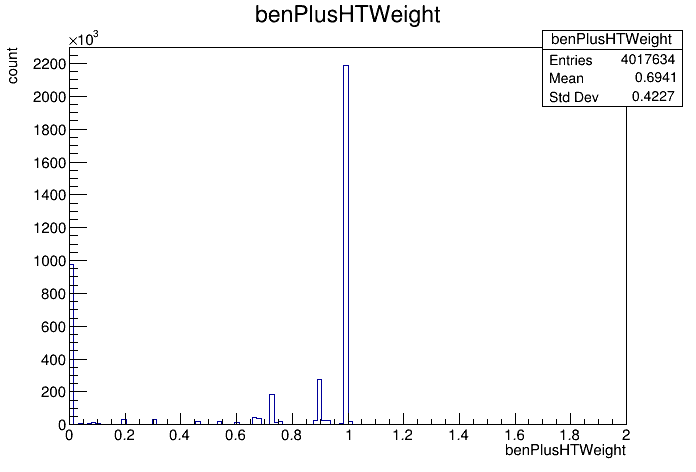

In [15]:
c = R.TCanvas()
histo_dict['norm_DY_LO_benPlusHTWeight'].Draw()
c.Draw()

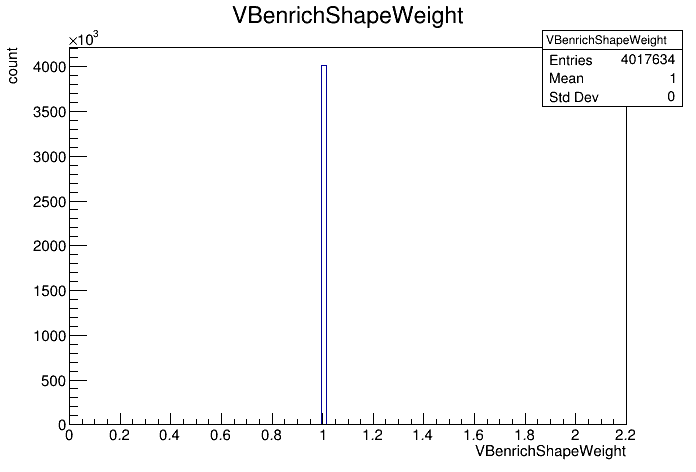

In [16]:
c = R.TCanvas()
histo_dict['norm_DY_LO_VBenrichShapeWeight'].Draw()
c.Draw()

In [4]:
string_list_for_DY_LO     = []
string_list_for_DY_NLO    = []

file_list = os.listdir(vnlo_path)
for _file in file_list:
    if _file in file_list_DY:
        string_list_for_DY_LO.append('{0}/{1}/*.root'.format(vnlo_path,_file))
    elif _file in file_list_DY_NLO:
        string_list_for_DY_NLO.append('{0}/{1}/*.root'.format(vnlo_path,_file))
    else:
        print("WARNING:::File : "+_file+" is not in any case. Will be DROPPED.")
#END


In [5]:
print(string_list_for_DY_NLO)
print(len(string_list_for_DY_NLO))

['/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0108_DYnloSTUDY/DYToLL_M-50_Pt-100To250_amcatnloFXFX/*.root', '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0108_DYnloSTUDY/DYToLL_M-50_Pt-250To400_amcatnloFXFX/*.root', '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0108_DYnloSTUDY/DYToLL_M-50_Pt-400To650_amcatnloFXFX/*.root', '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0108_DYnloSTUDY/DYToLL_M-50_Pt-50To100_amcatnloFXFX/*.root', '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0108_DYnloSTUDY/DYToLL_M-50_Pt-650ToInf_amcatnloFXFX/*.root', '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0108_DYnloSTUDY/DYToLL_M-50_amcatnloFXFX/*.root']
6


In [6]:
model_NLO = R.RDF.TH1DModel('DY_NLO', 'DY_NLO_LHE_Vpt', 300, 0, 3000)

In [7]:
rdf_dict['DY_NLO_50-100']     = R.RDataFrame('Events', string_list_for_DY_NLO[3], {'weight','benPlusHTWeight','VBenrichShapeWeight'})
rdf_dict['DY_NLO_100-250']    = R.RDataFrame('Events', string_list_for_DY_NLO[0], {'weight','benPlusHTWeight','VBenrichShapeWeight'})
rdf_dict['DY_NLO_250-400']    = R.RDataFrame('Events', string_list_for_DY_NLO[1], {'weight','benPlusHTWeight','VBenrichShapeWeight'})
rdf_dict['DY_NLO_400-650']    = R.RDataFrame('Events', string_list_for_DY_NLO[2], {'weight','benPlusHTWeight','VBenrichShapeWeight'})
rdf_dict['DY_NLO_650-Inf']    = R.RDataFrame('Events', string_list_for_DY_NLO[4], {'weight','benPlusHTWeight','VBenrichShapeWeight'})

In [8]:
histo_dict['DY_NLO_LHE_Vpt_50-100'] = rdf_dict['DY_NLO_50-100'].Histo1D(model_NLO,'LHE_Vpt')
histo_dict['DY_NLO_LHE_Vpt_50-100'].SetLineColor(632)
histo_dict['DY_NLO_LHE_Vpt_50-100'].Sumw2()


In [9]:
histo_dict['DY_NLO_LHE_Vpt_100-250'] = rdf_dict['DY_NLO_100-250'].Histo1D(model_NLO,'LHE_Vpt')
histo_dict['DY_NLO_LHE_Vpt_100-250'].SetLineColor(800)
histo_dict['DY_NLO_LHE_Vpt_100-250'].Sumw2()

In [10]:
histo_dict['DY_NLO_LHE_Vpt_250-400'] = rdf_dict['DY_NLO_250-400'].Histo1D(model_NLO,'LHE_Vpt')
histo_dict['DY_NLO_LHE_Vpt_250-400'].SetLineColor(400)
histo_dict['DY_NLO_LHE_Vpt_250-400'].Sumw2()

In [11]:
histo_dict['DY_NLO_LHE_Vpt_400-650'] = rdf_dict['DY_NLO_400-650'].Histo1D(model_NLO,'LHE_Vpt')
histo_dict['DY_NLO_LHE_Vpt_400-650'].SetLineColor(416)
histo_dict['DY_NLO_LHE_Vpt_400-650'].Sumw2()

In [12]:
histo_dict['DY_NLO_LHE_Vpt_650-Inf'] = rdf_dict['DY_NLO_650-Inf'].Histo1D(model_NLO,'LHE_Vpt')
histo_dict['DY_NLO_LHE_Vpt_650-Inf'].SetLineColor(600)
histo_dict['DY_NLO_LHE_Vpt_650-Inf'].Sumw2()

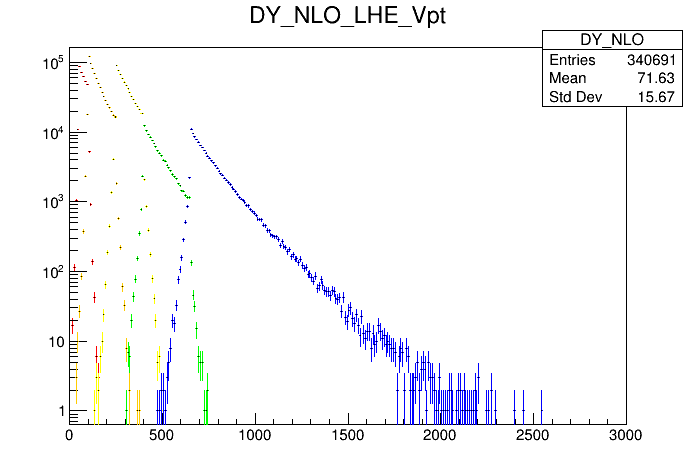

In [13]:
c = R.TCanvas()
c.SetLogy()
histo_dict['DY_NLO_LHE_Vpt_50-100'].Draw()
histo_dict['DY_NLO_LHE_Vpt_100-250'].Draw("SAME")
histo_dict['DY_NLO_LHE_Vpt_250-400'].Draw("SAME")
histo_dict['DY_NLO_LHE_Vpt_400-650'].Draw("SAME")
histo_dict['DY_NLO_LHE_Vpt_650-Inf'].Draw("SAME")
c.Draw()

In [6]:
rdf_dict['DY_LO']     = R.RDataFrame('Events', string_list_for_DY_LO, {'weight','benPlusHTWeight','VBenrichShapeWeight'})
rdf_dict['DY_NLO']    = R.RDataFrame('Events', string_list_for_DY_NLO, {'weight','benPlusHTWeight','VBenrichShapeWeight'})

In [7]:
model_LO  = R.RDF.TH1DModel('DY_LO', 'DY_LO_LHE_Vpt', 20, -1, 1)
model_NLO = R.RDF.TH1DModel('DY_NLO', 'DY_NLO_LHE_Vpt', 20, -1, 1)

In [17]:
histo_dict['DY_LO_LHE_Vpt']  = rdf_dict['DY_LO'].Histo1D('LHE_Vpt','weight')
histo_dict['DY_NLO_LHE_Vpt'] = rdf_dict['DY_NLO'].Histo1D('LHE_Vpt','weight')

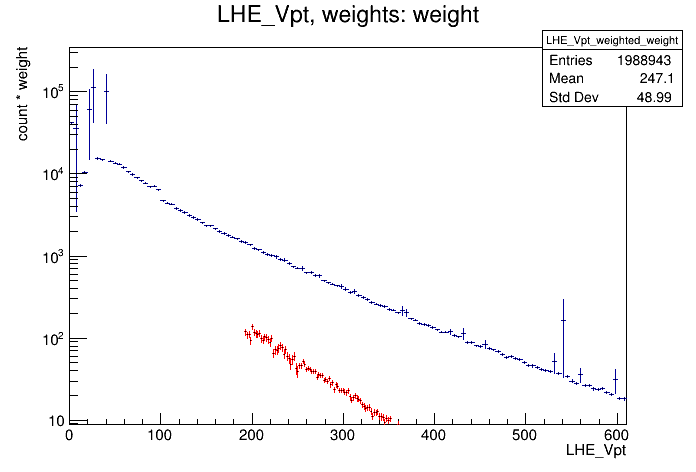

In [20]:
c = R.TCanvas()
c.SetLogy()
histo_dict['DY_LO_LHE_Vpt'].Draw()
histo_dict['DY_NLO_LHE_Vpt'].SetLineColor(R.kRed)
histo_dict['DY_NLO_LHE_Vpt'].Draw('SAME')
c.Draw()

In [5]:
for i in range(len(string_list_for_DY_LO)):
    print(str(i) + ' ' +string_list_for_DY_LO[i])

0 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-50_HT100to200_madgraph/*.root
1 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-50_HT1200to2500_madgraph/*.root
2 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-50_HT200to400_madgraph/*.root
3 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-50_HT2500toInf_madgraph/*.root
4 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-50_HT400to600_madgraph/*.root
5 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-50_HT600to800_madgraph/*.root
6 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-50_HT70to100_madgraph/*.root
7 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-50_HT800to1200_madgraph/*.root
8 /data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_DYnloSTUDY/DYToLL_M-5

In [6]:
model_LO = R.RDF.TH1DModel('DY_LO', 'DY_LO_LHE_HT', 300, 0, 3000)

In [7]:
rdf_dict['DY_LO_HT_0-70']     = R.RDataFrame('Events', string_list_for_DY_LO[8], {'weight','benPlusHTWeight','LHE_HT','intWeight'})
rdf_dict['DY_LO_HT_70-100']    = R.RDataFrame('Events', string_list_for_DY_LO[6], {'weight','benPlusHTWeight','LHE_HT','intWeight'})
rdf_dict['DY_LO_HT_100-200']    = R.RDataFrame('Events', string_list_for_DY_LO[0], {'weight','benPlusHTWeight','LHE_HT','intWeight'})
rdf_dict['DY_LO_HT_200-400']    = R.RDataFrame('Events', string_list_for_DY_LO[2], {'weight','benPlusHTWeight','LHE_HT','intWeight'})
rdf_dict['DY_LO_HT_400-600']    = R.RDataFrame('Events', string_list_for_DY_LO[4], {'weight','benPlusHTWeight','LHE_HT','intWeight'})
rdf_dict['DY_LO_HT_600-800']    = R.RDataFrame('Events', string_list_for_DY_LO[5], {'weight','benPlusHTWeight','LHE_HT','intWeight'})
rdf_dict['DY_LO_HT_800-1200']    = R.RDataFrame('Events', string_list_for_DY_LO[7], {'weight','benPlusHTWeight','LHE_HT','intWeight'})
rdf_dict['DY_LO_HT_1200-2500']    = R.RDataFrame('Events', string_list_for_DY_LO[1], {'weight','benPlusHTWeight','LHE_HT','intWeight'})
rdf_dict['DY_LO_HT_2500-Inf']    = R.RDataFrame('Events', string_list_for_DY_LO[3], {'weight','benPlusHTWeight','LHE_HT','intWeight'})

In [8]:
histo_dict['DY_LO_HT_0-70'] = rdf_dict['DY_LO_HT_0-70'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_0-70'].SetLineColor(632)
histo_dict['DY_LO_HT_0-70'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [9]:
histo_dict['DY_LO_HT_70-100'] = rdf_dict['DY_LO_HT_70-100'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_70-100'].SetLineColor(800)
histo_dict['DY_LO_HT_70-100'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [10]:
histo_dict['DY_LO_HT_100-200'] = rdf_dict['DY_LO_HT_100-200'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_100-200'].SetLineColor(416)
histo_dict['DY_LO_HT_100-200'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [11]:
histo_dict['DY_LO_HT_200-400'] = rdf_dict['DY_LO_HT_200-400'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_200-400'].SetLineColor(416)
histo_dict['DY_LO_HT_200-400'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [12]:
histo_dict['DY_LO_HT_400-600'] = rdf_dict['DY_LO_HT_400-600'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_400-600'].SetLineColor(600)
histo_dict['DY_LO_HT_400-600'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [13]:
histo_dict['DY_LO_HT_600-800'] = rdf_dict['DY_LO_HT_600-800'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_600-800'].SetLineColor(840)
histo_dict['DY_LO_HT_600-800'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [14]:
histo_dict['DY_LO_HT_800-1200'] = rdf_dict['DY_LO_HT_800-1200'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_800-1200'].SetLineColor(880)
histo_dict['DY_LO_HT_800-1200'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [15]:
histo_dict['DY_LO_HT_1200-2500'] = rdf_dict['DY_LO_HT_1200-2500'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_1200-2500'].SetLineColor(1)
histo_dict['DY_LO_HT_1200-2500'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [16]:
histo_dict['DY_LO_HT_2500-Inf'] = rdf_dict['DY_LO_HT_2500-Inf'].Histo1D(model_LO,'LHE_HT','intWeight')
histo_dict['DY_LO_HT_2500-Inf'].SetLineColor(920)
histo_dict['DY_LO_HT_2500-Inf'].Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


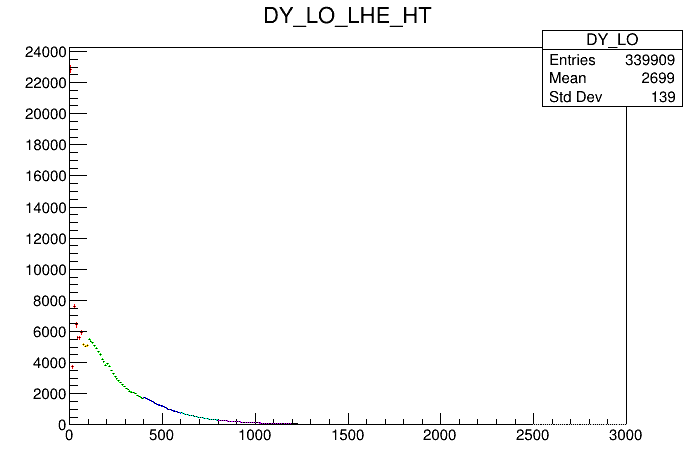

In [35]:
c = R.TCanvas()
c.SetLogy(0)
histo_dict['DY_LO_HT_0-70'].Draw()
histo_dict['DY_LO_HT_70-100'].Draw("SAME")
histo_dict['DY_LO_HT_100-200'].Draw("SAME")
histo_dict['DY_LO_HT_200-400'].Draw("SAME")
histo_dict['DY_LO_HT_400-600'].Draw("SAME")
histo_dict['DY_LO_HT_600-800'].Draw("SAME")
histo_dict['DY_LO_HT_800-1200'].Draw("SAME")
histo_dict['DY_LO_HT_1200-2500'].Draw("SAME")
histo_dict['DY_LO_HT_2500-Inf'].Draw("SAME")
c.Draw()